In [2]:
#Load the dataset
import pandas as pd
df = pd.read_csv("crop.csv", sep=';')


In [3]:
df.head()


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
#understand the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [5]:
# Unique values for categorical columns
print("Regions:", df['Region'].unique())
print("Soil Types:", df['Soil_Type'].unique())
print("Crops:", df['Crop'].unique())
print("Weather Conditions:", df['Weather_Condition'].unique())

# 2. Basic stats for numerical columns
print(df.describe())


Regions: ['West' 'South' 'North' 'East']
Soil Types: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crops: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Weather Conditions: ['Cloudy' 'Rainy' 'Sunny']
          Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  


In [6]:
#Visualize
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

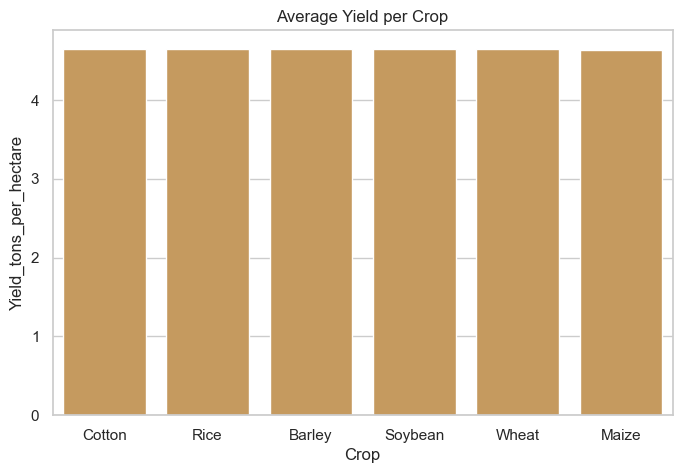

In [8]:
#which crop performs best
#Average Yield er crop
plt.figure(figsize=(8,5))
sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=df, errorbar=None, color="#D69C4E", )
plt.title("Average Yield per Crop")
plt.show()

<Axes: xlabel='Irrigation_Used', ylabel='Yield_tons_per_hectare'>

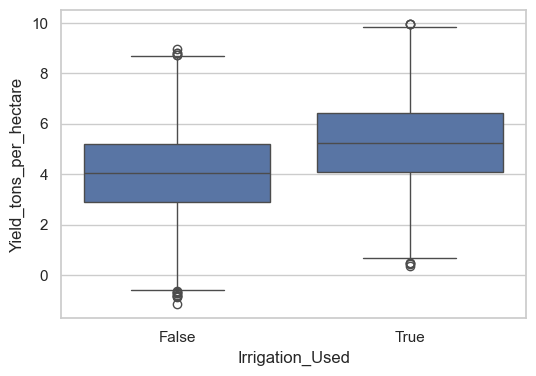

In [9]:
# does irrigation help
# . Yield vs Irrigation

plt.figure(figsize=(6,4))
sns.boxplot(
    x='Irrigation_Used', 
    y='Yield_tons_per_hectare', 
    data=df, 
    color="#4C72B0"     
)

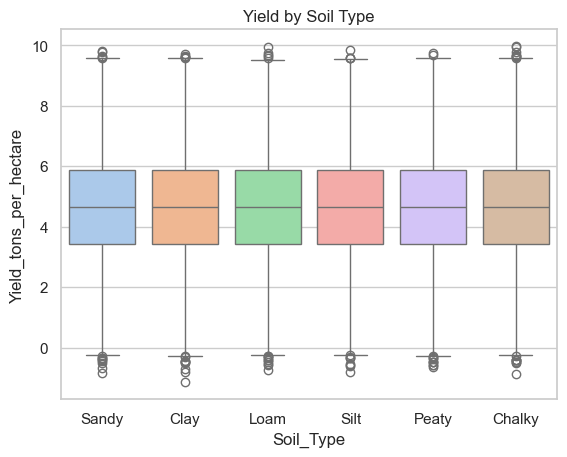

In [10]:
#Effect of Soil
#plt.figure(figsize=(8,5))
sns.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=df, palette="pastel", hue='Soil_Type', legend=False)
plt.title("Yield by Soil Type")
plt.show()

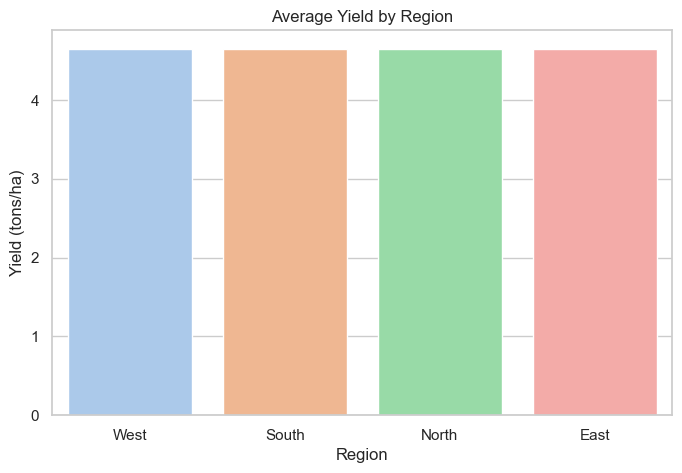

In [11]:
#Yield vs Region – best performing regions
plt.figure(figsize=(8,5))
sns.barplot(
    x='Region',
    y='Yield_tons_per_hectare',
    data=df,
    errorbar=None,           
    hue='Region',             
    palette="pastel",
    dodge=False,             
    legend=False             
)
plt.title("Average Yield by Region")
plt.ylabel("Yield (tons/ha)")
plt.xlabel("Region")
plt.show()

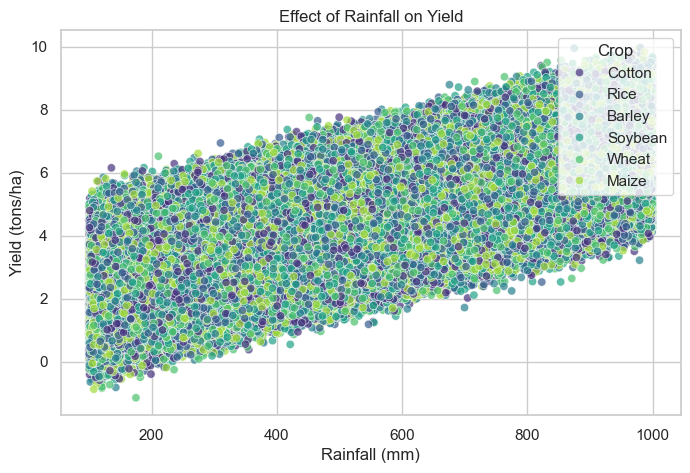

In [12]:
# 2️ Rainfall vs Yield – effect of rainfall
import matplotlib.pyplot as plt
import seaborn as sns

sample_df = df.sample(n=5000, random_state=42)  # 5000 random rows

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Rainfall_mm',
    y='Yield_tons_per_hectare',
    hue='Crop',              # color points by crop type
    palette="viridis",
    alpha=0.7,
    data=df
)
plt.title("Effect of Rainfall on Yield")
plt.ylabel("Yield (tons/ha)")
plt.xlabel("Rainfall (mm)")
plt.legend(title="Crop", loc="upper right")
plt.show()

In [7]:
# preparing the data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,   # number of trees
    max_depth=None,     # expand until all leaves are pure
    random_state=42,
    n_jobs=-1           # use all cores
)

In [11]:
# List of categorical columns
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

In [12]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [13]:
# Features and target
X = df_encoded.drop('Yield_tons_per_hectare', axis=1)
y = df_encoded['Yield_tons_per_hectare']

In [14]:
#Convert boolean columns to integers
X["Fertilizer_Used"] = X["Fertilizer_Used"].astype(int)
X["Irrigation_Used"] = X["Irrigation_Used"].astype(int)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (800000, 20)
Testing features shape: (200000, 20)


In [18]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)


In [19]:
#Create a smaller training sample
df_small = df.sample(n=200_000, random_state=42)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,        # reduced
    max_depth=20,            
    min_samples_leaf=10,     # smoother trees
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)
 
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,        #  reduced
    max_depth=20,            #  limit tree depth
    min_samples_leaf=10,     #  smoother trees
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                      random_state=42)

In [21]:
#Evaluate model performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.4045322358544057
RMSE: 0.5069923342551592
R²: 0.9108408003698482


In [22]:
# Feature Importance
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
0,Rainfall_mm,0.631750
2,Fertilizer_Used,0.208861
3,Irrigation_Used,0.133158
1,Temperature_Celsius,0.015193
4,Days_to_Harvest,0.005523
19,Weather_Condition_Sunny,0.000602
18,Weather_Condition_Rainy,0.000601
5,Region_North,0.000444
7,Region_West,0.000443
6,Region_South,0.000442


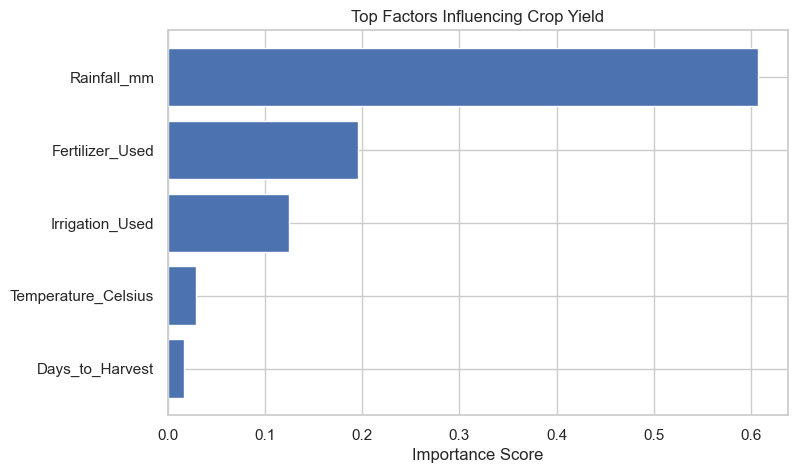

In [31]:
# Visualize Top 5 Drivers
import matplotlib.pyplot as plt

top_features = feature_importance.head(5)

plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title("Top Factors Influencing Crop Yield")
plt.xlabel("Importance Score")
plt.show()


In [23]:
# Save the model & columns
import joblib

# Save trained Random Forest model
joblib.dump(rf_model, "crop_yield_model.pkl")

# Save feature column order
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

print("Model and feature columns saved successfully")


Model and feature columns saved successfully


In [24]:
#save the retrained
joblib.dump(
    rf_model,
    "crop_yield_model.pkl",
    compress=3
)


['crop_yield_model.pkl']

In [25]:
import joblib

joblib.dump(
    rf_model,
    "crop_yield_model.pkl",
    compress=0
)


['crop_yield_model.pkl']

In [26]:
loaded_model = joblib.load("crop_yield_model.pkl")


In [27]:
type(loaded_model)


sklearn.ensemble._forest.RandomForestRegressor

In [28]:
loaded_model.predict(X_test[:1])


array([4.06855704])

In [29]:
def predict_yield(model, input_df):
    return float(model.predict(input_df)[0])


In [33]:
loaded_model.feature_names_in_


array(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest', 'Region_North',
       'Region_South', 'Region_West', 'Soil_Type_Clay', 'Soil_Type_Loam',
       'Soil_Type_Peaty', 'Soil_Type_Sandy', 'Soil_Type_Silt',
       'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean',
       'Crop_Wheat', 'Weather_Condition_Rainy', 'Weather_Condition_Sunny'],
      dtype=object)

In [34]:
import pandas as pd

farmer_inputs = pd.DataFrame([{
    "Rainfall_mm": 850,
    "Temperature_Celsius": 26,
    "Fertilizer_Used": 1,
    "Irrigation_Used": 1,
    "Days_to_Harvest": 120,

    "Region_North": 1,
    "Region_South": 0,
    "Region_West": 0,

    "Soil_Type_Clay": 0,
    "Soil_Type_Loam": 1,
    "Soil_Type_Peaty": 0,
    "Soil_Type_Sandy": 0,
    "Soil_Type_Silt": 0,

    "Crop_Cotton": 0,
    "Crop_Maize": 1,
    "Crop_Rice": 0,
    "Crop_Soybean": 0,
    "Crop_Wheat": 0,

    "Weather_Condition_Rainy": 1,
    "Weather_Condition_Sunny": 0
}])


In [35]:
#testing prediction
prediction = loaded_model.predict(farmer_inputs)
print("Predicted Crop Yield:", prediction[0])


Predicted Crop Yield: 7.323645278199999
